In [79]:
# いつも使うやつ
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# pandasで全ての列を表示
pd.options.display.max_columns = None

# 図をipython notebook内で表示
%matplotlib inline

# DeplicatedWarningを避けるため
import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)

# やりたいこと

Survivedの値を推定したい（要するに生存したか、亡くなったか）

### タイタニックをwikiで調べる

* https://ja.wikipedia.org/wiki/%E3%82%BF%E3%82%A4%E3%82%BF%E3%83%8B%E3%83%83%E3%82%AF_(%E5%AE%A2%E8%88%B9)
* https://ja.wikipedia.org/wiki/%E3%82%BF%E3%82%A4%E3%82%BF%E3%83%8B%E3%83%83%E3%82%AF%E5%8F%B7%E6%B2%88%E6%B2%A1%E4%BA%8B%E6%95%85

* 女性と子供が優先
* ローレン・アリソン（一等船客の子供で唯一犠牲になった） -> 一等級の子供はほぼ助かっている
* タイタニック号が致命的な事故に近づく時までに、ほとんどの乗客は眠っていた
* スペースに余裕があるまま救命ボートは出した
  * マードックは女性と子供の他にわずかだが男性も乗せた
    * どちらの船員もボートを降ろす時に1隻あたりの安全積載人数を知らず、気をつけすぎていっぱいまで乗せないという過ちを犯した。
    * 天気も海の状態も非常に安定していたため、68名いっぱい乗せても充分安全に降ろせたはずであった。
      * もし積載人数いっぱいまで乗せていたら、もう500名ほどの人々の命が救えたであろうと考えられている。
      * これが行われなかったため、救命ボートは多くの空席があるまま進水し、数百名の人々（大部分が男性）が船に取り残された
* 救命ボートに乗った乗客のほとんどは一等船室及び二等船室の乗客であった。
  * 船尾の三等船室にいた乗客はほとんどデッキにたどり着けず、通路でうろうろと迷い、三等船室を一等や二等の区域と分けている壁や仕切りに阻まれて動けなかった

↑から

* 氷山にあたった浸水や衝撃で亡くなった人はいない？
    * そういう情報がない
* 女性と子供は生存率が高い
    * 子供のうち1等級は1人以外、2等級は全員が生存した
* 救命ボートに乗った乗客のほとんどは一等船室及び二等船室の乗客
    * 三等級は乗せてもらえない人も多かった

### カラム意味

* survival 生存したか否か
	* 0 = No, 1 = Yes
* pclass 乗客の階級
	* 1 = 1st; 2 = 2nd; 3 = 3rd
	* 社会経済におけるステータス、1stが上流、2ndが中流、3rdが下流
* name 名前
* sex 性別
* age 年齢
	* 1歳未満の場合は小数
	* 推定年齢の場合はxx.5などという表記
* 親族関係の変数
	* sibsp タイタニック号に乗っていたSibling/Spouseの数
        * Sibling: 兄弟、姉妹、義兄弟、義姉妹
        * Spouse: 夫、妻
            * 愛人や婚約者については除外
	* parch タイタニック号に乗っていたParent/Childrenの数
        * Parent: 母親、父親
        * Child: 息子、娘、まま息子、まま娘
            * 無視されている関係も存在
            * いとこ、甥、姪、おじ、おば、舅、姑は除外
            * ベビーシッターとだけ旅行していた何人かの子供はparch=0
            * 親友や近所の人と旅行に来ていた人に対しての属性はない
* ticket チケットナンバー
* fare 乗車料金（ドルかな？）
* cabin Cabin(船室の部屋番号?)
* embarked 乗船場
	* C = Cherbourg, Q = Queenstown; S = Southampton

In [80]:
# データをそれぞれ読み込む
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
submission_df = pd.read_csv('./data/gender_submission.csv')

In [81]:
# データを眺める
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### 雑メモ

前回試したときは、

* 75%, 説明変数: 性別, LogisticRegression()
* 74%, 説明変数: 年齢, 性別, LogisticRegression()
* 74%, 説明変数: 年齢, 性別, Pclass, RandomForest()

という感じ
kaggleのシェアdocみたいなところを見てて良さそうなpythonのコードがあったのでそこを試す

この御方のコード: https://github.com/zlatankr/Projects/tree/master/Titanic

なんと82.78%出したらしい
考え方を学びます。

In [90]:
test = pd.DataFrame({'test': {}})
test['test'] = train_df['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

In [91]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 前処理

In [92]:
# Ageの欠損値を埋める

In [93]:
# 名前を使って、lengthと敬称を取得する
def names(train, test):
    for i in [train, test]:
        i['Name_Len'] = i['Name'].apply(lambda x: len(x))
        i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
    return train, test

In [94]:
train_df, test_df = names(train_df, test_df)

In [97]:
train_df['AgeMean'] = train_df['Age']
train_df['_AgeMean'] = train_df.groupby(['Name_Title', 'Pclass'])['Age'].transform('mean') # グルーピング毎に関数を実行して欠損値に値をいれる
train_df['AgeMean'] = train_df['Age'].fillna(train_df['_AgeMean'])

In [100]:
train_df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Len,Name_Title,_AgeMean,AgeMean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23,Mr.,28.724891,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,51,Mrs.,40.882353,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22,Miss.,16.123188,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,Mrs.,40.882353,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24,Mr.,28.724891,35.000000
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,16,Mr.,28.724891,28.724891


In [105]:
# 性別をintにする
train_df['SexInt'] = train_df['Sex'].map({'female': 0, 'male': 1}).astype(int)

## プロットする

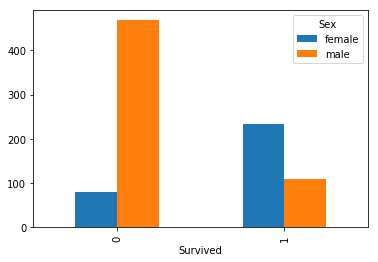

In [106]:
train_df.pivot_table(index=['Survived'], columns='Sex', values='PassengerId', aggfunc='count').plot(kind='bar')

In [107]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name_Len,_AgeMean,AgeMean,SexInt
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.012986,0.074451,0.043320,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.332350,-0.045260,-0.076577,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.220001,-0.593331,-0.403874,0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.034612,0.646239,1.000000,0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.165019,-0.277912,-0.275823,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.252282,-0.189348,-0.192591,-0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.155832,0.247428,0.114526,-0.182333
Name_Len,-0.012986,0.332350,-0.220001,0.034612,0.165019,0.252282,0.155832,1.000000,0.143174,0.043238,-0.448759
_AgeMean,0.074451,-0.045260,-0.593331,0.646239,-0.277912,-0.189348,0.247428,0.143174,1.000000,0.680689,0.184376
AgeMean,0.043320,-0.076577,-0.403874,1.000000,-0.275823,-0.192591,0.114526,0.043238,0.680689,1.000000,0.124592


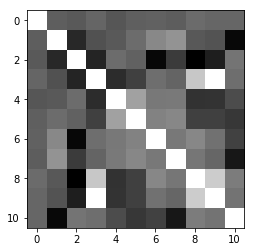

In [117]:
# 相関係数をplot
plt.imshow(train_df.corr(), interpolation='none')
plt.gray()
plt.show()
# だいたい一般的な目安としては 0.7 以上だと強い相関があると言われている。。。らしい
# 真っ白は正の相関が大きい
# 真っ黒は負の相関が大きい

* -1　 ～ 　-0.7 　　　　　強い負の相関　
* -0.7　 ～ 　-0.4　　　　　 かなりの負の相関
* -0.4　 ～ 　-0.2 　　　　　やや相関あり
* -0.2　 ～　　 0　　　　　　 ほとんど相関なし
* 0　　 ～　　0.2　　　　　　ほとんど相関なし
* 0.2　 ～ 　 0.4 　　　　　やや相関あり
* 0.4　 ～ 　 0.7　　　　　 かなりの正の相関
* 0.7 　～ 　　1　　　　　　強い正の相関


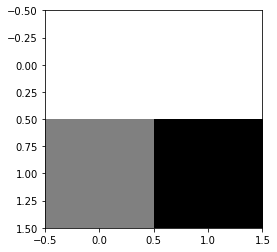

In [115]:
# 負の相関でも真っ白になる？
___plot_test = pd.DataFrame({'test': [0, -100], 'test2': [0, -200]})
plt.imshow(___plot_test, interpolation='none')
plt.gray()
plt.show()

In [116]:
___plot_test

,test,test2
0,0,0
1,-100,-200


真っ黒になりました
* 白 -> 正の相関が高い
* 黒 -> 負の相関が高い

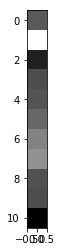

In [121]:
# survivedとの相関を出してみる
_corr_survived = train_df.corr()[['Survived']]
plt.imshow(_corr_survived, interpolation='none')
plt.gray()
plt.show()

In [130]:
_corr_survived

,Survived
PassengerId,-0.005007
Survived,1.000000
Pclass,-0.338481
Age,-0.077221
SibSp,-0.035322
Parch,0.081629
Fare,0.257307
Name_Len,0.332350
_AgeMean,-0.045260
AgeMean,-0.076577


見た感じ、
* やや相関: Pclass, Name_Len
* 相関ありそう: SexInt
* 強い: なし

って感じっ　ぽい

### チケットの話

相関なさそうと思っていたけど、参考のgithubをみるとticketも色々確認できるところがあるとのこと。試す

In [132]:
train_df['Ticket'].head(15)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object

ここから、チケットの番号の文字数と先頭の文字列は部屋の特定に使えないか（仮設） -> 逃げ遅れたとかわかるのでは？ ということを確認してみる

In [135]:
# これはわからん
train_df.groupby('Ticket')['Survived'].mean().head()

Ticket
110152    1.000000
110413    0.666667
110465    0.000000
110564    1.000000
110813    1.000000
Name: Survived, dtype: float64

In [138]:
train_df['TicketLength'] = train_df['Ticket'].apply(lambda x: len(x))

In [140]:
train_df.groupby('TicketLength')['Survived'].mean()

TicketLength
3     0.000000
4     0.366337
5     0.618321
6     0.319809
7     0.296296
8     0.539474
9     0.192308
10    0.341463
11    0.250000
12    0.400000
13    0.400000
15    0.333333
16    0.272727
17    0.428571
18    0.000000
Name: Survived, dtype: float64

ありそうかな？

In [143]:
train_df['TicketLength'].value_counts()

6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
13     10
12     10
15      9
11      8
18      6
3       2
Name: TicketLength, dtype: int64

次はTicketの先頭の文字、チケット会社のもの？（仮設）。もしかしたらキャビンの部屋を推測できるものかも（仮設）

In [149]:
# string型にして0番目を取得
train_df['TicketLeft'] = train_df['Ticket'].apply(lambda x: str(x)[0])

In [150]:
train_df['TicketLeft'].value_counts()

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: TicketLeft, dtype: int64

In [156]:
train_df.groupby('TicketLeft')['Survived'].mean()

TicketLeft
1    0.630137
2    0.464481
3    0.239203
4    0.200000
5    0.000000
6    0.166667
7    0.111111
8    0.000000
9    1.000000
A    0.068966
C    0.340426
F    0.571429
L    0.250000
P    0.646154
S    0.323077
W    0.153846
Name: Survived, dtype: float64

なんか関係ありそう！

In [157]:
train_df.groupby('TicketLeft')['Survived'].count()

TicketLeft
1    146
2    183
3    301
4     10
5      3
6      6
7      9
8      2
9      1
A     29
C     47
F      7
L      4
P     65
S     65
W     13
Name: Survived, dtype: int64

### Fareの話

In [163]:
# 3つのクラスに分けたらどう？
pd.qcut(train_df['Fare'], 3).value_counts()

[0, 8.662]       308
(26, 512.329]    295
(8.662, 26]      288
Name: Fare, dtype: int64

In [167]:
train_df['Survived'].groupby(pd.qcut(train_df['Fare'], 3)).mean()

Fare
[0, 8.662]       0.198052
(8.662, 26]      0.402778
(26, 512.329]    0.559322
Name: Survived, dtype: float64

高いお金を払った人は助かっているっぽい

In [171]:
# Pclassとクロス集計
pd.crosstab(pd.qcut(train_df['Fare'], 5), columns=train_df['Pclass'])

Pclass,1,2,3
Fare,,,
"[0, 7.854]",6,6,167
"(7.854, 10.5]",0,24,160
"(10.5, 21.679]",0,80,92
"(21.679, 39.688]",64,64,52
"(39.688, 512.329]",146,10,20


クラスと運賃を見ると明らかに関係あるよね？という話

運賃安いのに一等の人がきになるな

### Cabinの話

 cabin使えないよ。と、思っていたけど、この方使えるかもだって。まじか

In [196]:
# 先頭文字だけ取得する
train_df['CabinLeft'] = train_df['Cabin'].apply(lambda x: str(x)[0])

In [198]:
# nはNaNのこと
train_df['CabinLeft'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: CabinLeft, dtype: int64

In [202]:
train_df['Survived'].groupby(train_df['CabinLeft']).mean()

CabinLeft
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

おおー！すごい。少ない数ではあるが、BやD、Eの生存率は高い

In [ ]:
pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)

In [243]:
pd.get_dummies(train_df[['CabinLeft']], drop_first = True)

,CabinLeft_B,CabinLeft_C,CabinLeft_D,CabinLeft_E,CabinLeft_F,CabinLeft_G,CabinLeft_T,CabinLeft_n
0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,1
6,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,1


In [ ]:
pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)

In [247]:
train_df = pd.concat((train_df, pd.get_dummies(train_df[['CabinLeft']], prefix = 'ClabinLeft')), axis = 1)

### Embarkedの話

In [205]:
# 欠損値がある
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Len,Name_Title,_AgeMean,AgeMean,SexInt,TicketLength,TicketLeft,CabinLeft
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,19,Miss.,30.000000,38.0,0,6,1,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,41,Mrs.,40.882353,62.0,0,6,1,B


In [213]:
# C = Cherbourg, Q = Queenstown, S = Southampton
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [212]:
# 全体で割っている？
train_df['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [208]:
train_df['Survived'].groupby(train_df['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

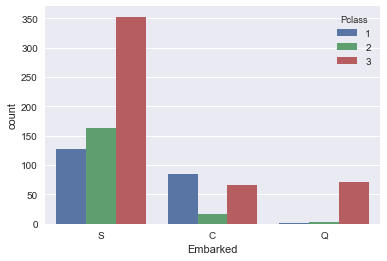

In [217]:
# seaboneキレイだな
sns.countplot(train_df['Embarked'], hue=train_df['Pclass'])

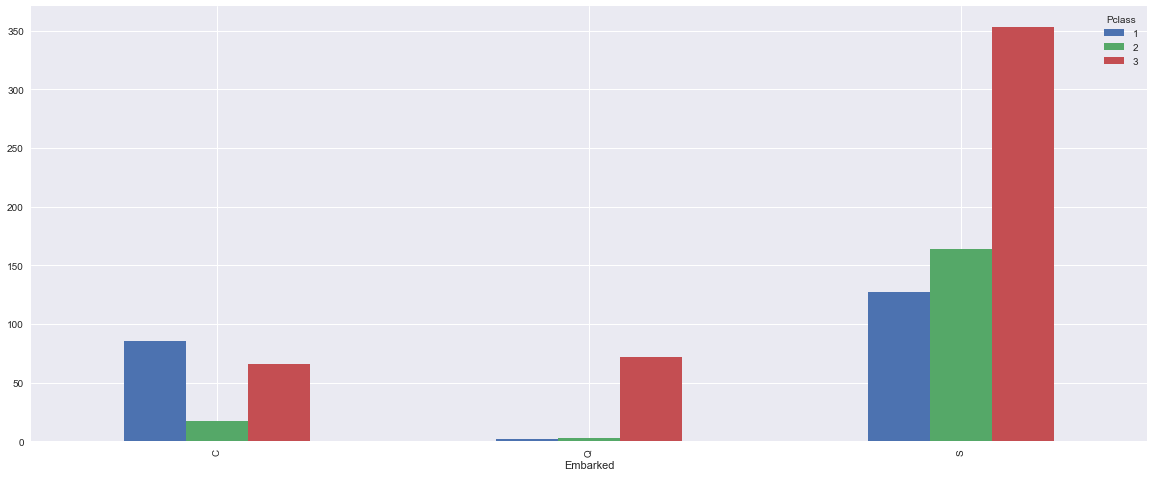

In [226]:
# pivot_tableでやる場合
pd.pivot_table(train_df, index=['Embarked'], columns='Pclass', values='Survived', aggfunc='count').plot(kind='bar', figsize=(20, 8))

In [231]:
# 多いクラスで埋めます
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [232]:
# 欠損値はない
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Len,Name_Title,_AgeMean,AgeMean,SexInt,TicketLength,TicketLeft,CabinLeft


In [236]:
# 値にする
train_df['EmbarkedInt'] = train_df['Embarked'].map({'S':0, 'C': 1, 'Q':2}).astype(int)

In [249]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name_Len,_AgeMean,AgeMean,...,EmbarkedInt,ClabinLeft_A,ClabinLeft_B,ClabinLeft_C,ClabinLeft_D,ClabinLeft_E,ClabinLeft_F,ClabinLeft_G,ClabinLeft_T,ClabinLeft_n
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.012986,0.074451,0.043320,...,-0.030467,-0.003256,0.069552,-0.040957,0.022828,0.042351,-0.035772,-0.060049,-0.013814,-0.019919
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.332350,-0.045260,-0.076577,...,0.106811,0.022287,0.175095,0.114652,0.150716,0.145321,0.057935,0.016040,-0.026456,-0.316912
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.220001,-0.593331,-0.403874,...,0.045702,-0.204934,-0.369572,-0.417048,-0.278690,-0.230091,0.011063,0.055561,-0.052496,0.725541
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.034612,0.646239,1.000000,...,0.010171,0.136309,0.093914,0.122041,0.136975,0.121440,-0.083970,-0.077296,0.039474,-0.249732
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.165019,-0.277912,-0.275823,...,-0.059961,-0.046266,-0.034538,0.029251,-0.017575,-0.036865,0.001706,-0.001402,-0.015907,0.040460
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.252282,-0.189348,-0.192591,...,-0.078665,-0.040325,0.056498,0.030736,-0.019125,-0.016554,0.023694,0.072388,-0.015878,-0.036987
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.155832,0.247428,0.114526,...,0.062142,0.019549,0.386297,0.364318,0.098878,0.053717,-0.033093,-0.025180,0.002224,-0.482075
Name_Len,-0.012986,0.332350,-0.220001,0.034612,0.165019,0.252282,0.155832,1.000000,0.143174,0.043238,...,-0.107749,0.040929,0.084238,0.134802,0.059675,0.019580,0.020637,0.076263,0.003739,-0.190943
_AgeMean,0.074451,-0.045260,-0.593331,0.646239,-0.277912,-0.189348,0.247428,0.143174,1.000000,0.680689,...,-0.096326,0.166929,0.195996,0.256510,0.175656,0.134166,-0.101388,-0.033566,0.044219,-0.414817
AgeMean,0.043320,-0.076577,-0.403874,1.000000,-0.275823,-0.192591,0.114526,0.043238,0.680689,1.000000,...,-0.059717,0.142659,0.101068,0.145237,0.141118,0.118152,-0.081713,-0.072799,0.038567,-0.267333


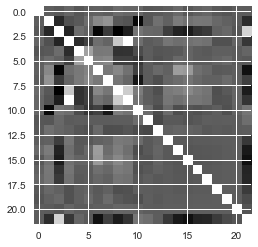

In [248]:
# 相関係数をplot
plt.imshow(train_df.corr(), interpolation='none')
plt.gray()
plt.show()
# だいたい一般的な目安としては 0.7 以上だと強い相関があると言われている。。。らしい
# 真っ白は正の相関が大きい
# 真っ黒は負の相関が大きい

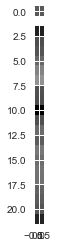

In [250]:
# survivedとの相関を出してみる
_corr_survived = train_df.corr()[['Survived']]
plt.imshow(_corr_survived, interpolation='none')
plt.gray()
plt.show()

ごちゃごちゃしてきたので、githubの関数をもらう

In [82]:
import sys
sys.path.append('./lib/')

import feature_process_helper

In [83]:
train = train_df.copy()
test = test_df.copy()

In [84]:
train, test = feature_process_helper.names(train, test)
train, test = feature_process_helper.age_impute(train, test)
train, test = feature_process_helper.cabin_num(train, test)
train, test = feature_process_helper.cabin(train, test)
train, test = feature_process_helper.embarked_impute(train, test)
train, test = feature_process_helper.fam_size(train, test)
train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x))
test['Ticket_Len'] = test['Ticket'].apply(lambda x: len(x))
train, test = feature_process_helper.dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked',
                                                                     'Cabin_Letter', 'Name_Title', 'Fam_Size'])
train, test = feature_process_helper.drop(train, test, bye = ['Ticket'])

In [94]:
# ちょっと調整する
parameter = ['Sex_male', 'Name_Title_Mr.', 'Fare', 'Age', 'Name_Len', 'Sex_female', 'Pclass_3']
_delete_train = train[parameter].copy()
_delete_test = test[parameter].copy()

In [85]:
train.head()

,PassengerId,Survived,Age,Fare,Name_Len,Age_Null_Flag,"Cabin_num_[2, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148]",Ticket_Len,Pclass_3,Pclass_1,Pclass_2,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q,Cabin_Letter_n,Cabin_Letter_C,Cabin_Letter_E,Cabin_Letter_G,Cabin_Letter_D,Cabin_Letter_A,Cabin_Letter_B,Cabin_Letter_F,Name_Title_Mr.,Name_Title_Mrs.,Name_Title_Miss.,Name_Title_Master.,Name_Title_Rev.,Name_Title_Dr.,Name_Title_Ms.,Name_Title_Col.,Fam_Size_Nuclear,Fam_Size_Solo,Fam_Size_Big
0,1,0,22.0,7.2500,23,0,0,0,0,9,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,2,1,38.0,71.2833,51,0,0,0,1,8,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,3,1,26.0,7.9250,22,0,0,0,0,16,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,4,1,35.0,53.1000,44,0,0,0,1,6,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,5,0,35.0,8.0500,24,0,0,0,0,6,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [95]:
rf = RandomForestClassifier(max_features='auto',
                                oob_score=True,
                                random_state=1,
                                n_jobs=-1)

param_grid = { "criterion"   : ["gini", "entropy"],
             "min_samples_leaf" : [1,5,10],
             "min_samples_split" : [2, 4, 10, 12, 16],
             "n_estimators": [50, 100, 400, 700, 1000]}

gs = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=3,
                  n_jobs=-1)

In [96]:
gs = gs.fit(_delete_train.iloc[:, 2:], _delete_train.iloc[:, 1])


# #### Inspect best parameters


print(gs.best_score_)
print(gs.best_params_)

0.976430976431
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 50}


In [97]:
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=50,
                             min_samples_split=16,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(_delete_train.iloc[:, 2:], _delete_train.iloc[:, 1])
print("%.4f" % rf.oob_score_)

0.9753


削減前は 0.8215

In [98]:
pd.concat((pd.DataFrame(_delete_train.iloc[:, 2:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)

,variable,importance
3,Sex_female,0.656090
1,Age,0.164675
2,Name_Len,0.108661
0,Fare,0.064092
4,Pclass_3,0.006482


In [106]:
_delete_test.head()

,Sex_male,Name_Title_Mr.,Fare,Age,Name_Len,Sex_female,Pclass_3
0,1,1,7.8292,34.5,16,0,1
1,0,0,7.0000,47.0,32,1,1
2,1,1,9.6875,62.0,25,0,0
3,1,1,8.6625,27.0,16,0,1
4,0,0,12.2875,22.0,44,1,1


In [104]:
_delete_test.iloc[:, 1:].head()

,Name_Title_Mr.,Fare,Age,Name_Len,Sex_female,Pclass_3
0,1,7.8292,34.5,16,0,1
1,0,7.0000,47.0,32,1,1
2,1,9.6875,62.0,25,0,0
3,1,8.6625,27.0,16,0,1
4,0,12.2875,22.0,44,1,1


In [110]:
_delete_test['Fare'].fillna(_delete_train['Fare'].mean(), inplace = True)
predictions = rf.predict(_delete_test.iloc[:, 2:])
predictions = pd.DataFrame(predictions, columns=['Survived'])
predictions = pd.concat((submission_df['PassengerId'], predictions), axis = 1)
predictions.to_csv('y_test_delete.csv', sep=",", index = False)

In [111]:
predictions.head()

,PassengerId,Survived
0,892,1
1,893,0
2,894,1
3,895,1
4,896,0


In [112]:
# 交差検定をサクッとやるためのモジュールを読み込む
from sklearn.cross_validation import cross_val_score

In [113]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

cv_scores = cross_val_score(rf, train.iloc[:, 2:], train.iloc[:, 1], scoring='log_loss', cv=5, n_jobs=-1)

In [114]:
print('%.4f (%.4f)' % (cv_scores.mean(), cv_scores.std()))

-0.4265 (0.0618)


kaggleにアップしたところ  
0.803 !!!

削除したのでやったら、0.229...

### 今回学んだことまとめ


* カテゴリカルなデータはダミー変数にする
* 名前の文字数にして説明変数にするのもあり
    * 相関係数が大きいかどうかはやってみないとわからん
* 年齢の欠損値は名前敬称とPclassの平均を埋めた
* Embarkedの欠損値は乗客が一番大きいところの値で埋めた
* CabinやTicketなどは一見関係なさそうだし、欠損値が多いのもあったが、規則性を見つけてやってみると説明変数に使えるようになった
* 年齢などは```pd.qcut()```などで区分するとそのままカテゴリカル（？）なデータとして使える

#### 次できそうなこと

* 他モデルを使ってみる
* データをじっくり眺めてみる
    * 色々想像してみる